In the last file, we introduced the Spark cluster computing framework and explored some basic PySpark methods. In this file, we'll walk through how to set up Spark on our own computer and integrate PySpark with Jupyter Notebook. We can use Spark in two modes:

* Local mode - The entire Spark application runs on a single machine. Local mode is what we'll use to prototype Spark code on our own computer. It's also easier to set up.
* Cluster mode - The Spark application runs across multiple machines. Cluster mode is what we'll use when we want to run our Spark application across multiple machines in a cloud environment like Amazon Web Services, Microsoft Azure, or Digital Ocean.

For now, we'll walk through the instructions for installing Spark in local mode on Windows, Mac, and Linux. We'll cover how to install Spark in cluster mode as part of the data engineering track.

Here's a diagram describing the high-level components we'll be setting up:

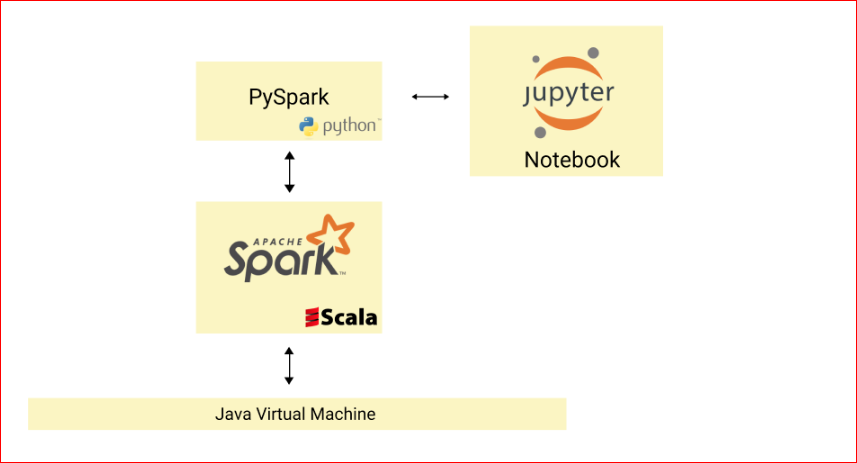

Spark runs on the Java Virtual Machine, or JVM for short, which comes in the Java SE Development Kit (JDK for short). We recommend installing Java SE Development Kit version 7 or higher, which we can download from Oracle’s website:

http://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html

As of this writing, Java SE Development Kit 8u111 and 8u112 are the two latest releases of the JDK. Any version after JDK 7 works, so we can download any of the versions on this page. Select the appropriate installation file for our operating system.

If we're on Windows or Linux, be sure to choose the correct instruction set architecture (x86 or x64) for our computer. Each computer chip has a specific instruction set architecture that determines the maximum amount of memory it can work with. The two main types are x86 (32 bit) and x64 (64-bit). If we're not sure which one our computer has, we can find out by following [this guide if we're on Windows](http://support.wdc.com/KnowledgeBase/answer.aspx?ID=9405) or [this one if we're on Linux](http://www.howtogeek.com/198615/how-to-check-if-your-linux-system-is-32-bit-or-64-bit/).

To verify that the installation worked, launch our command line application (Command Prompt for Windows and Terminal for Mac and Linux) and run:

**java -version**

The output should be similar to:

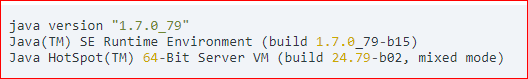

While the exact numbers probably won't match, the key thing to verify is that the version is larger than 1.7. This number actually represents Version 7. If we're interested, we can read why at [Oracle's website](http://www.oracle.com/technetwork/java/javase/jdk7-naming-418744.html).

If running java -version returned an error or a different version than the one we just installed, our Java JDK installation most likely wasn't added to our PATH properly. Read this [post](http://cloudlink.soasta.com/t5/CloudTest-Knowledge-Base/Adding-JDK-Path-in-Mac-OS-X-Linux-or-Windows/ta-p/43867) to learn more about how to properly add the Java executable to our PATH.

Now that we have the JVM set up, let's move on to Spark.

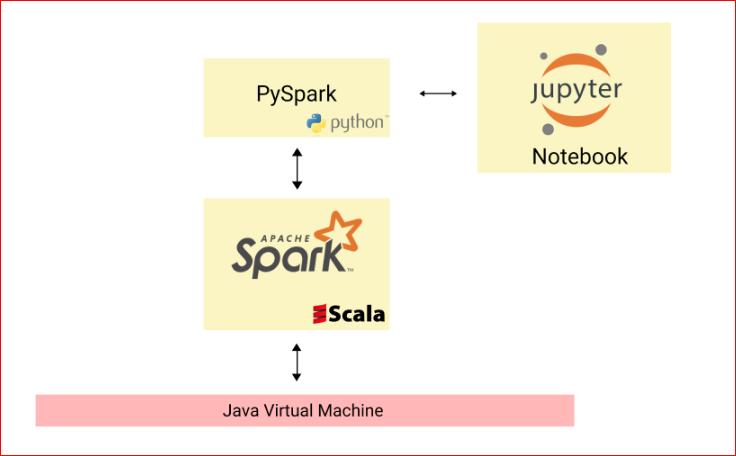

Because we've installed JDK, we could technically download the original source code and build Spark on our computer. Building from the source code is the process of generating an executable program for our machine. It involves many steps. While there are some performance benefits to building Spark from source, it takes a while to do, and it's hard to debug if the build fails.

We'll download and work with a pre-built version of Spark instead. Navigate to the [Spark downloads page](http://spark.apache.org/downloads.html) and select the following options:

1. **2.4.5**
 * Note: Any Spark version prior to 2.0.0 is incompatible with Python 3.6. If we have Python 3.6, we recommend downloading one of the newer versions of Spark.
2. **Pre-built for Hadoop 2.7**
3. **Direct Download**

Next, click the link that appears in Step 3 to download Spark as a **.TGZ** file to our computer.Unzip the file and move the resulting folder into our home directory (i.e C Drive). Windows does not have a built in utility that can unzip **tgz** files - we recommend downloading and using [7-Zip](http://www.7-zip.org/). Once we have unzipped the file, move the resulting folder into our home directory (C Drive). For more information, watch this [video](https://www.youtube.com/watch?v=XvbEADU0IPU) & that [video](https://www.youtube.com/watch?v=e_QoFQjZwqc&t=247s)

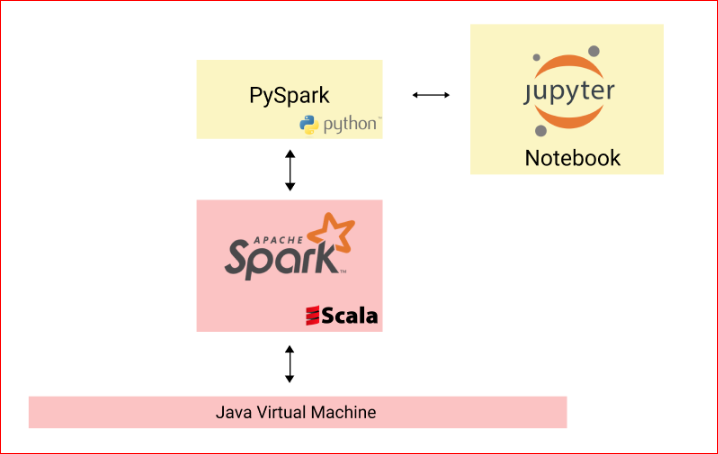

In the last file, we learned that PySpark is a Python library that allows us to interact with Spark objects. The source code for the PySpark library is located in the **python/pyspark** directory, but the executable version of the library is located in **bin/pyspark**. To test whether our installation built Spark properly, run the command **pyspark** to start up the PySpark shell. The output should be similar to this:

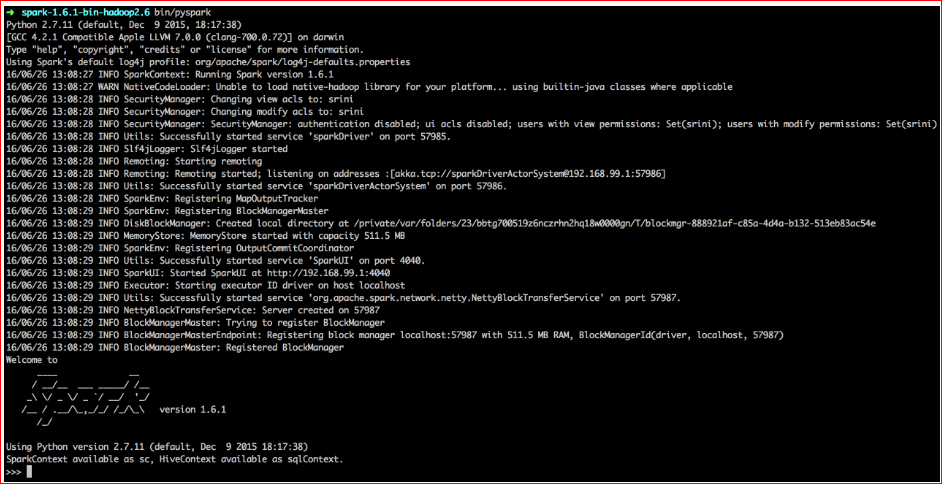

We can make our Jupyter Notebook application aware of Spark in a few different ways. 

1. One is to create a configuration file and launch Jupyter Notebook with that configuration. 
2. Another is to import PySpark at runtime. 

We'll focus on the latter approach, so we won't have to restart Jupyter Notebook each time we want to use Spark.

First, we'll need to copy the full path to the pre-built Spark folder and set it as a shell environment variable. This way, we can specify Spark's location a single time, and every Python program we write will have access to it. If we move the Spark folder, we can change the path specification once and our code will work just fine.

### Mac / Linux

* Use nano or another text editor to open shell environment's configuration file. If we're using the default Terminal application, the file should be in **~/.bash_profile** . If we're using ZSH instead, our configuration file will be in **~/.zshrc**.

* Add the following line to the end of the file, replacing {full path to Spark} with the actual path to Spark:

**export SPARK_HOME="{full path to Spark, eg /users/home/jeff/spark-2.0.1-bin-hadoop2.7/}"**

* Exit the text editor and run either source ~/.bash_profile or source ~/.zshrc so the shell reads in and applies the update we made.

### Windows

* If we've never added environment variables, read [this tutorial](http://pythoncentral.io/add-python-to-path-python-is-not-recognized-as-an-internal-or-external-command/) before we proceed.
* Set the **SPARK_HOME** environment variable to the full path of the Spark folder (e.g. c:/Users/Jeff/spark-2.0.1-bin-hadoop2.7/).

Next, let's install the [findspark](https://github.com/minrk/findspark) Python library, which looks up the location of PySpark using the environment variable we just set. Use pip to install the findspark library:

**conda install -c conda-forge findspark**
or 

**pip install findspark**

Now that we've set up all of the tools we need, let's test the installation!

Download [recent-grads.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv) to our computer and use the command line to navigate to its location. Start Jupyter Notebook, create a new notebook, and run the following code to test our installation:

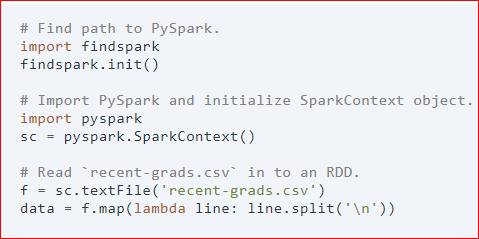

If we don't get any errors and can see the first 10 lines of recent-grads.csv, then we're good to go! We can use Google,StackOverflow, or in the [Dataquest Community](https://community.dataquest.io/) to get help if we need it.

In [1]:
# Find path to PySpark.
import findspark
findspark.init()

In [2]:
findspark.find()

'C:\\spark-2.4.5-bin-hadoop2.7'

In [3]:
# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext()

In [4]:
numeric_val = sc.parallelize([1,2,3,4])
numeric_val.map(lambda x:x**3).collect()

[1, 8, 27, 64]

In [5]:
# Read `recent-grads.csv` in to an RDD.
f = sc.textFile('recent-grads.csv')
data = f.map(lambda line: line.split('\n'))
data.take(10)

[['Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs'],
 ['1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564344,36,1976,1849,270,1207,37,0.018380527,110000,95000,125000,1534,364,193'],
 ['2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50'],
 ['3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037383,3,648,558,133,340,16,0.024096386,73000,50000,105000,456,176,0'],
 ['4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313196,16,758,1069,150,692,40,0.050125313,70000,43000,80000,529,102,0'],
 ['5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341630502,289,25694,23170,5180,16697,1672,0.061097712,65000,50000,75000,18314,4440,972'],
 ['6,2418,NUCLEAR ENGINEERING,2573,2200,373,En